In [1]:
import pandas as pd
import pickle
import sys, os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../code/")
out_overall = pickle.load(open('../data/input/all_regions.pkl', 'r'))
from common_functions import tableau20blind, format_axes, latexify
from regional_average_contribution import contribution

In [2]:
%matplotlib inline

In [3]:
best_transform_sd_austin = {'fridge':'DD',
                           'hvac':'DD-percentage',
                           'wm':'regional',
                           'mw':'DD-percentage',
                           'dw':'None',
                           'oven':'DD'}

In [4]:
train_region = "SanDiego"
test_region = "Austin"
#test_region = "Austin"
#train_region = "Boulder"
out_overall = pickle.load(open('../data/input/all_regions.pkl','r'))

train_df = out_overall[train_region]
test_df = out_overall[test_region]

In [5]:
Appliances = ['fridge','hvac','wm','mw','dw','oven']
out = {}
for k in range(1,8):
    
    out[k] = {}
    #for appliance in ["hvac","fridge","dr","wm"]:
    for appliance in Appliances:
        print appliance, k
        transform = best_transform_sd_austin[appliance]
        if appliance=="hvac":
            start, stop=5, 11
        else:
            start, stop=1, 13
        out[k][appliance] = {}
        for month in range(start,stop):
            out[k][appliance][month] = {}
            for test_home in test_df.index[:]:
                try:
                    pred =  pickle.load(open(os.path.expanduser('~/ineq_cross/%s_%s_%s_%s_%d_%d_%d.pkl' %(train_region,
                                                                                               test_region,
                                                                                               transform,
                                                                                               appliance,
                                                                                               month,
                                                                                               test_home,
                                                                                               k)),'r'))
                    gt = test_df.ix[test_home]['%s_%d' %(appliance, month)]
                    error = np.abs(gt-pred)
                    percentage_error = error*100/gt
                   
                    out[k][appliance][month][test_home] = percentage_error
                except Exception, e:
                    pass


    

fridge 1
hvac 1
wm 1
mw 1
dw 1
oven 1
fridge 2
hvac 2
wm 2
mw 2
dw 2
oven 2
fridge 3
hvac 3
wm 3
mw 3
dw 3
oven 3
fridge 4
hvac 4
wm 4
mw 4
dw 4
oven 4
fridge 5
hvac 5
wm 5
mw 5
dw 5
oven 5
fridge 6
hvac 6
wm 6
mw 6
dw 6
oven 6
fridge 7
hvac 7
wm 7
mw 7
dw 7
oven 7


In [6]:
o = {}
for appliance in Appliances:
    o[appliance]={}
    for k in range(1, 8):
        o[appliance][k] = pd.DataFrame(out[k][appliance]).median().mean()

In [7]:
sen_num_neighbours_df = pd.DataFrame(o).T

In [8]:
sen_num_neighbours_df = sen_num_neighbours_df.ix[['fridge','hvac','wm','mw','dw','oven']]

In [9]:
sen_num_neighbours_df.index = ['Fridge','HVAC','Washing\nmachine','Micro-\nwave','Dish\nwasher','Oven']

In [28]:
latexify(columns=1)

In [33]:
sen_num_neighbours_df

,1,2,3,4,5,6,7
Fridge,32.039637,23.883796,23.342505,23.294841,23.680811,23.954996,24.917006
HVAC,29.044505,26.162457,26.634442,27.087217,27.522710,27.790505,27.954469
Washing\nmachine,51.563039,50.401650,49.847082,48.616911,48.004238,47.781991,47.459718
Micro-\nwave,116.588166,132.231297,67.988560,165.137110,178.645764,189.042436,200.747037
Dish\nwasher,92.174125,68.811135,63.309244,61.558015,63.294917,62.421605,65.047826
Oven,87.633508,63.449850,49.990886,53.522842,51.079754,50.926282,50.388615


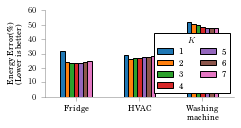

In [51]:
latexify(columns=1, fig_height=1.55)
colors = tableau20blind[::2]
sen_num_neighbours_df.ix[['Fridge','HVAC','Washing\nmachine']].plot(kind="bar", rot=0, colors=colors).legend(ncol=2, title='$K$',loc=4)
format_axes(plt.gca())
plt.ylabel("Energy Error(\%)\n(Lower is better)")
plt.savefig('../results/sd_austin_sensitivity_num_neighbours.pdf',bbox_inches="tight")

In [123]:
pd.DataFrame(out[6]['mw']).median().describe()

KeyError: 6